In [59]:
import numpy as np
from matplotlib import pyplot as plt

# Zadanie 1
Liczba próbek (w jednym okresie) sygnału rzeczywistego $s(t) = sin(2 \pi t)$ wynosi N, gdzie N jest potęgą 2.

## 1.a
Przyjmując N = 8 wykreślić przebieg sygnału spróbkowanego, widmo amplitudowe i fazowe oraz zweryfikować eksperymentalnie słuszność twierdzenia Parsevala.

In [60]:
def s(t):
    return np.sin(2 * np.pi * t)

N = 8

space = np.linspace(0, 1, N, endpoint = False)
signal = s(space)

spectrum = np.fft.fft(signal)

# wynik zawiera bardzo małe wartości pozostałe po przybliżeniach algorytmu, zaburzają one wykres, więc je zaokrąglimy
spectrum.real[np.abs(spectrum.real) < 1e-10] = 0
spectrum.imag[np.abs(spectrum.imag) < 1e-10] = 0

ampl_spectrum = np.abs(spectrum) / N
phase_spectrum = np.angle(spectrum)


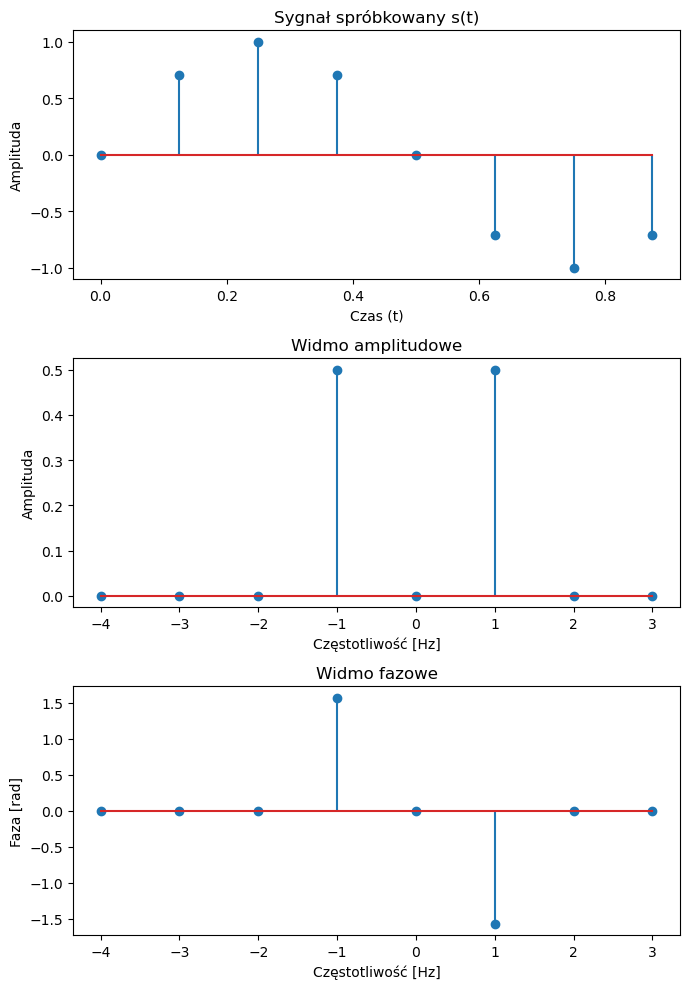

In [61]:
# Plotting

frequencies = np.fft.fftfreq(N) * N

fig, axs = plt.subplots(3, 1, figsize=(7, 10))
axs[0].stem(space, signal)
axs[0].set_title("Sygnał spróbkowany s(t)")
axs[0].set_xlabel("Czas (t)")
axs[0].set_ylabel("Amplituda")

axs[1].stem(frequencies, ampl_spectrum)
axs[1].set_title("Widmo amplitudowe")
axs[1].set_xlabel("Częstotliwość [Hz]")
axs[1].set_ylabel("Amplituda")

axs[2].stem(frequencies, phase_spectrum)
axs[2].set_title("Widmo fazowe")
axs[2].set_xlabel("Częstotliwość [Hz]")
axs[2].set_ylabel("Faza [rad]")

plt.tight_layout()
plt.show()

In [62]:
# Parseval

energy_time = np.sum(signal ** 2)
energy_freq = np.sum(np.abs(spectrum) ** 2) / N


print(f"Energia w dziedzinie czasu: {energy_time:.4f}")
print(f"Energia w dziedzinie częstotliwości: {energy_freq:.4f}")
print(f"Czy energie są równe? {'Tak' if np.isclose(energy_time, energy_freq) else 'Nie'}")


Energia w dziedzinie czasu: 4.0000
Energia w dziedzinie częstotliwości: 4.0000
Czy energie są równe? Tak


### Wnioski

Pole pod wykresem sygnału i suma próbek równe są sobie równe, zatem oba mają tę samą moc. Jest to zgodne z twierdzeniem Parsevala.

 ## 1.b
 Wykreślić wykres przedstawiający czas wyznaczania widma sygnału dyskretnego za pomocą
 algorytmu FFT w funkcji liczby próbek
 $N=2^l, l \in \{3, 4, ..., 13\}$.
 Skomentować kształt
 otrzymanego wykresu odnosząc się do teoretycznej złożoności obliczeniowej algorytmu FFT.

In [63]:
from time import perf_counter

exponents = np.arange(3, 13+1)
N = 2 ** exponents

REPEATS = 50_000
total_times = []

for exponent in exponents:
  sample_count = 2**exponent
  space = np.linspace(0, 1, sample_count)
  signal = s(space)
  start = perf_counter()
  for n in range(REPEATS):
    _ = np.fft.fft(signal)
  end = perf_counter()
  total_times.append(end - start)



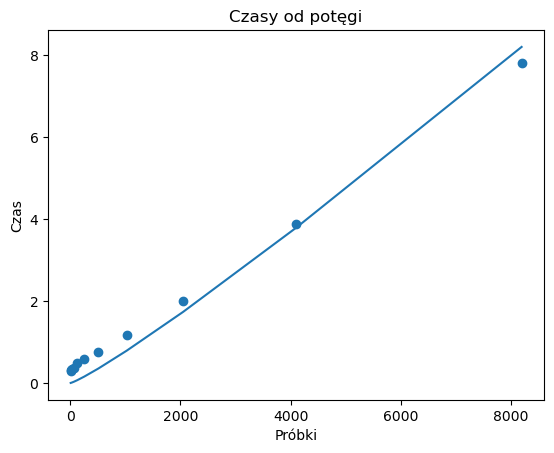

In [64]:
SCALE_PLOT = 1/9000

plt.scatter(N, total_times)
plt.plot(N, N * np.log(N) * SCALE_PLOT)
plt.ylabel('Czas')
plt.xlabel('Próbki')
plt.title('Czasy od potęgi')
plt.show()

### Wnioski

Naiwny algorytm DFT ma złożoność $O(N^2)$, natomiast użyty przez nas FFT ma złożoność $O(N\log(N))$. Uzyskane wartości czasu potwierdzają tę teoretyczną złożonośc - wartości rosną podobnie do funkcji N log(N).

# Zad 2
!TODO

# Zadanie 3
Zbadać wpływ dopełnienia zerami na postać widma amplitudowego i widma fazowego dyskretnego
sygnału 𝑠[𝑛] = $𝐴 (1 − \frac{n\mod N}{N})$ o amplitudzie 𝐴 = 4 i okresie podstawowym 𝑁 = 12. W tym celu dla
każdej wartości 𝑁0 ∈ {0,1𝑁, 4𝑁, 9𝑁} wykreślić widmo amplitudowe i fazowe sygnału 𝑠[𝑛]
dopełnionego 𝑁0 zerami. Skomentować otrzymane wyniki

Dodanie 0N zer:


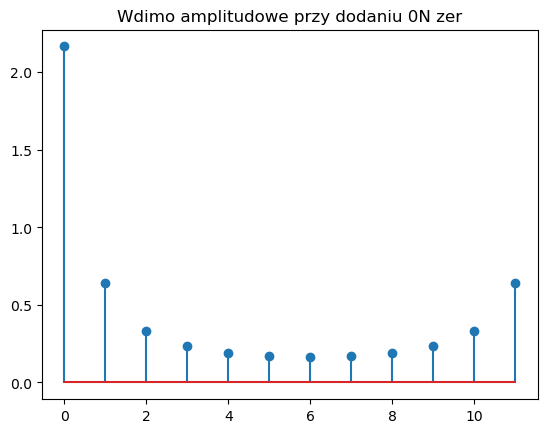

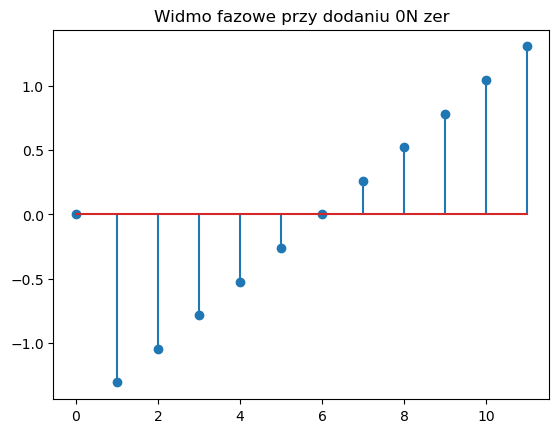

Dodanie 1N zer:


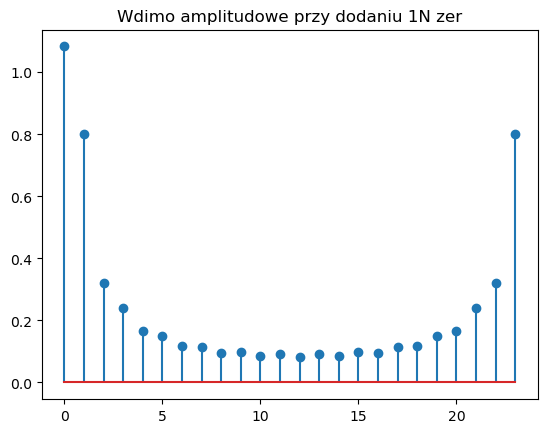

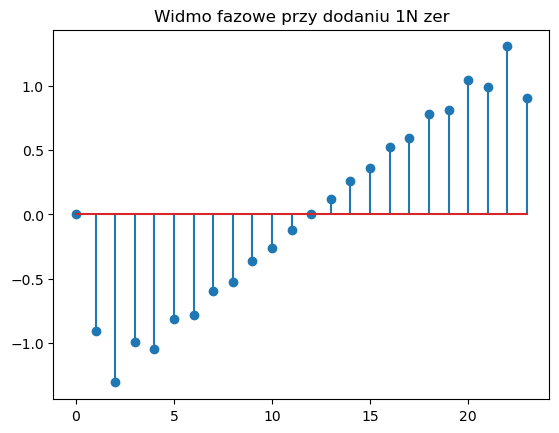

Dodanie 4N zer:


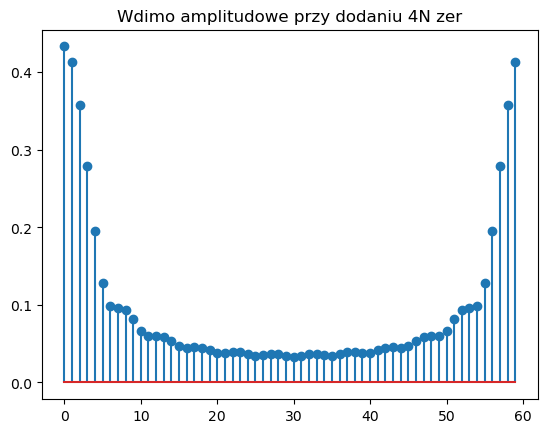

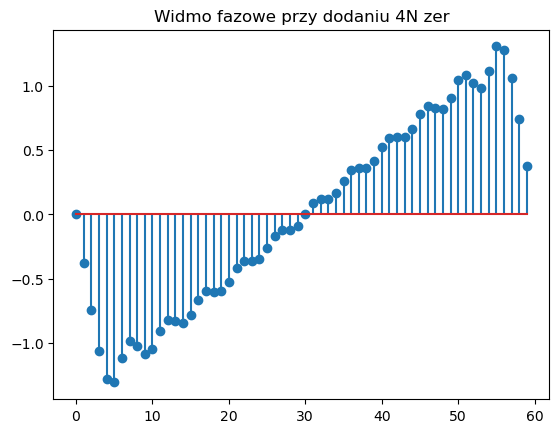

Dodanie 9N zer:


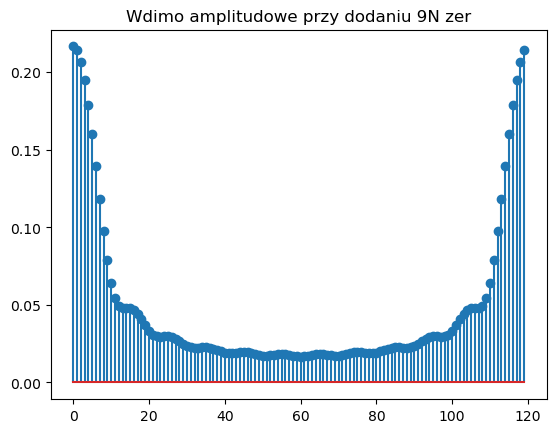

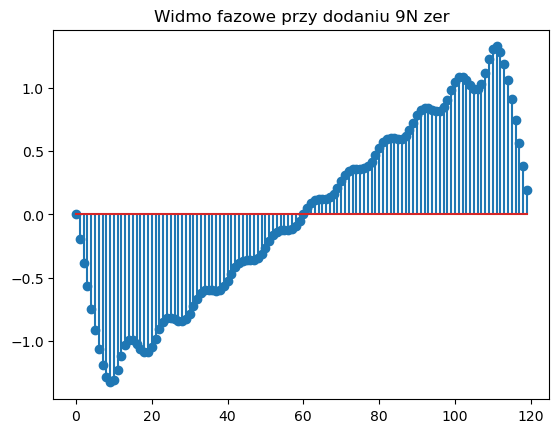

In [65]:
A = 4
N = 12
N0_list = [0, 1, 4, 9]

def s(n):
    return A * (1 - (n % N) / N)

signal = [s(n) for n in range(N)]

for n0_base in N0_list:
    n0 = n0_base * N
    s_with_zeros = signal + [0.0] * n0
    spectrum = np.fft.fft(s_with_zeros)
    ampl_spectrum = np.abs(spectrum) / (N + n0)
    phase_spectrum = np.angle(spectrum)
    
    print(f"Dodanie {n0_base}N zer:")

    plt.stem(ampl_spectrum)
    plt.title(f"Wdimo amplitudowe przy dodaniu {n0_base}N zer")
    plt.show()

    plt.stem(phase_spectrum)
    plt.title(f"Widmo fazowe przy dodaniu {n0_base}N zer")
    plt.show()




## Wnioski

Dopełnienie sygnału zerami zwiększa liczbę próbek na okres i "zagęszcza" otrzymane widma. Zwiększamy w ten sposób rozdzielczość wyliczanej dyskretnej transformaty Fouriera